In [1]:
import pickle
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization
from tensorflow.keras.losses import SparseCategoricalCrossentropy

def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

# Charger les données CIFAR-10
train_data = []
train_labels = []

for i in range(1, 6):
    data_dict = unpickle(f'data_batch_{i}')
    if i == 1:
        train_data = data_dict[b'data']
        train_labels = data_dict[b'labels']
    else:
        train_data = np.vstack((train_data, data_dict[b'data']))
        train_labels = np.hstack((train_labels, data_dict[b'labels']))

test_dict = unpickle('test_batch')
test_data = test_dict[b'data']
test_labels = np.array(test_dict[b'labels'])

meta_dict = unpickle('batches.meta')
label_names = meta_dict[b'label_names']

train_data = train_data.reshape((len(train_data), 3, 32, 32)).transpose(0, 2, 3, 1)
train_data = train_data / 255.0
test_data = test_data.reshape((len(test_data), 3, 32, 32)).transpose(0, 2, 3, 1)
test_data = test_data / 255.0

# Diviser les données d'entraînement en ensembles d'entraînement et de validation
x_train, x_val, y_train, y_val = train_test_split(train_data, train_labels, test_size=0.2, random_state=42, stratify=train_labels)

# Afficher les dimensions des données
print("Dimensions des données d'entraînement :", train_data.shape)
print("Dimensions des données de test :", test_data.shape)
print("Dimensions des données d'entraînement après division :", x_train.shape)
print("Dimensions des données de validation :", x_val.shape)

# Définir le modèle
model = Sequential([
    Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.2),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.3),

    Conv2D(256, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.4),

    Flatten(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(10)
])

# Compiler le modèle
model.compile(optimizer='adam',
              loss=SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Entraîner le modèle sur les données d'entraînement et de validation
history = model.fit(x_train, y_train, epochs=20, batch_size=64, validation_data=(x_val, y_val))

# Enregistrer l'historique d'entraînement
with open('history3.pkl', 'wb') as f:
    pickle.dump(history.history, f)

# Évaluer le modèle sur les données de test
loss, accuracy = model.evaluate(test_data, test_labels)
print(f'Loss: {loss}, Accuracy: {accuracy}')


Dimensions des données d'entraînement : (50000, 32, 32, 3)
Dimensions des données de test : (10000, 32, 32, 3)
Dimensions des données d'entraînement après division : (40000, 32, 32, 3)
Dimensions des données de validation : (10000, 32, 32, 3)
Epoch 1/20
625/625 [==============================] - 25s 24ms/step - loss: 1.6001 - accuracy: 0.4534 - val_loss: 1.2663 - val_accuracy: 0.5579
Epoch 2/20
625/625 [==============================] - 14s 23ms/step - loss: 0.9863 - accuracy: 0.6536 - val_loss: 0.9732 - val_accuracy: 0.6648
Epoch 3/20
625/625 [==============================] - 14s 23ms/step - loss: 0.7979 - accuracy: 0.7222 - val_loss: 0.7688 - val_accuracy: 0.7302
Epoch 4/20
625/625 [==============================] - 14s 22ms/step - loss: 0.6891 - accuracy: 0.7636 - val_loss: 1.2555 - val_accuracy: 0.6065
Epoch 5/20
625/625 [==============================] - 14s 23ms/step - loss: 0.6033 - accuracy: 0.7904 - val_loss: 0.7617 - val_accuracy: 0.7499
Epoch 6/20
625/625 [=================

313/313 [==============================] - 1s 3ms/step


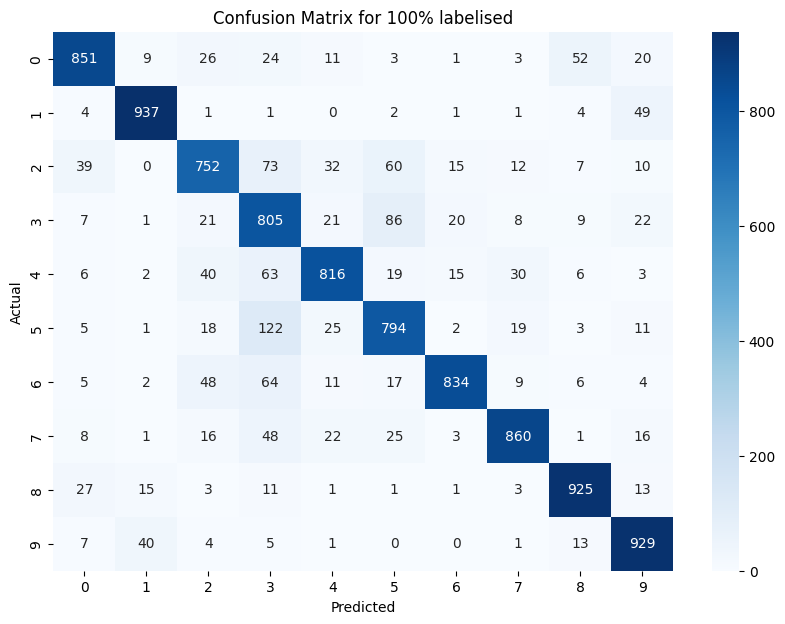

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

pred_labels = np.argmax(model.predict(test_data), axis=1)

cm = confusion_matrix(test_labels, pred_labels)

def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

plot_confusion_matrix(cm, 'Confusion Matrix for 100% labelised')